# Geometry
## One Dimensional Geometry

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
import matplotlib.pyplot as plt
from math import pi,sin
import numpy as np
sys.path.append('../../Py/GUI')
from suiteGUI import *

We introduce the object we are going to mesh, in one dimension, a straight line starting at 0 and ending at $\pi$, i.e. the interval $I=[0,\pi]$.

In [2]:
I = line(0.0,2.0)

We now mesh the interval dividing it in uniform volume of a given length $h=0.2$. We can access the volume that make up the mesh converting the object to string. In particular we first introduce the mesh specifying the dimension of the object, then we pass the object that we are meshing together with the size of the volumes making up the mesh.

In [3]:
mesh = Mesh(1);
mesh.UniformMesh(I,0.1)
mesh

|1D Mesh|
Mesh made by 20.
0. [0.000000,0.100000]
1. [0.100000,0.200000]
2. [0.200000,0.300000]
3. [0.300000,0.400000]
4. [0.400000,0.500000]
5. [0.500000,0.600000]
6. [0.600000,0.700000]
7. [0.700000,0.800000]
8. [0.800000,0.900000]
9. [0.900000,1.000000]
10. [1.000000,1.100000]
11. [1.100000,1.200000]
12. [1.200000,1.300000]
13. [1.300000,1.400000]
14. [1.400000,1.500000]
15. [1.500000,1.600000]
16. [1.600000,1.700000]
17. [1.700000,1.800000]
18. [1.800000,1.900000]
19. [1.900000,2.000000]

We can access the mesh dimension and the number of elements in the mesh as follow:

In [4]:
mesh.getDim()

1

In [5]:
mesh.getElNumber()

20

We now define a given function on the afore built mesh, we can also evaluate the function in a specific point passing as argument the degree ( either 0 or 1) of polynomial interpolation with in the mesh volumes.

In [6]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [1-(p[0])**2/4])

In [7]:
f

If we use degree 0 we get obtain a slight mismatch since we approximate from the right.

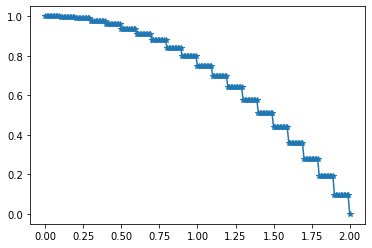

In [8]:
Draw(f,mesh,0)

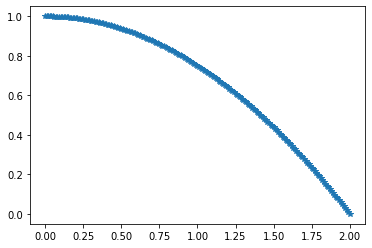

In [9]:
Draw(f,mesh,1)

We can also transform to vector type the a mesh function and also import a vector to fill a mesh function:

In [10]:
v = f.vec_export()
v

(1.000000,0.997500,0.990000,0.977500,0.960000,0.937500,0.910000,0.877500,0.840000,0.797500,0.750000,0.697500,0.640000,0.577500,0.510000,0.437500,0.360000,0.277500,0.190000,0.097500,0.000000)

In [11]:
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u.vec_import(v)
u.vec_export()

(1.000000,0.997500,0.990000,0.977500,0.960000,0.937500,0.910000,0.877500,0.840000,0.797500,0.750000,0.697500,0.640000,0.577500,0.510000,0.437500,0.360000,0.277500,0.190000,0.097500,0.000000)

There are also quadrature formulas configured for the mesh functions:

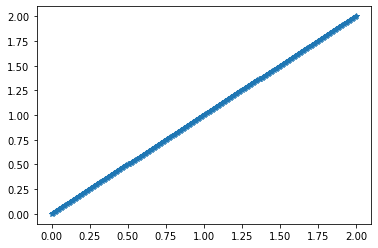

In [12]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [p[0]])
Draw(f,mesh,1)

In [13]:
NewtonCotes(f,0.01,0)

2.0000000000000004

In [14]:
NewtonCotes(f,0.1,1)

2.0

In [15]:
Integrate(f,mesh)

[2.0]

[2.6730158730158724]

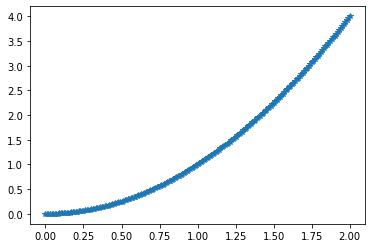

In [16]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [p[0]**2])
Draw(f,mesh,1)
Integrate(f,mesh)

## Two Dimensional Geometry

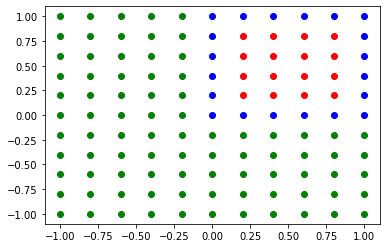

In [17]:
Geo = Geometry(2);
def distSquare(P):
    """
    y2 -> *----------*
           |          |
           |          |
           |          |
    y1 -> *----------*
           ^          ^
           |x1        |x2
    """
    x1 = 0; x2 = 1; y1 = 0; y2=1;
    return max([P[0]-x2,x1-P[0],P[1]-y2,y1-P[1]])
Geo.add(distSquare)
GeoDraw(Geo,[[-1,1],[-1,1]],10)

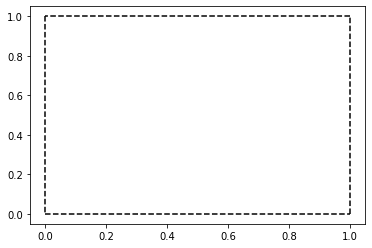

In [19]:
Q = Square()
P = Point2D();
P.Set([0.0,0.0])
Q.setVertex(P,0)
P.Set([1.0,0.0])
Q.setVertex(P,1)
P.Set([1.0,1.0])
Q.setVertex(P,2)
P.Set([0.0,1.0])
Q.setVertex(P,3)
DrawSquare(Q)